# Petrus Semprebom Massabki

> Este notebook contém a resolução do Projeto em Machine Learning da Alura, no qual se investigou a aplicabilidade de modelos de regressão e classificação na previsão dos alunos com melhor desempenho no ENEM 2017 a partir de notas parciais. Foi possível revelar as disciplinas com maior influência na nota final e atestar que alguns modelos cumprem com razoabilidade o objetivo proposto. Verificou-se, no entanto, uma certa inadequação, visto que a seleção dos "melhores alunos" perde qualidade à medida que as disciplinas contempladas pelo modelo são reduzidas, tornando a classificação cada vez mais injusta.

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# import warnings
# warnings.simplefilter("once")

# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet
# !pip install yellowbrick=="0.9.0" --quiet
# !pip install numpy=="1.16.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import yellowbrick
import numpy as np

pd.options.mode.chained_assignment = None

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.1.5
Usando seaborn 0.11.1
Usando scipy 1.4.1
Usando yellowbrick 0.9.1
Usando numpy 1.19.5


In [4]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [5]:
# solução
path = "input/MICRODADOS_ENEM_2017.csv"
cols = ["NU_NOTA_CN",
        "NU_NOTA_CH",
        "NU_NOTA_LC",
        "NU_NOTA_MT",
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5"]
        
enem = pd.read_csv(path, sep=";", encoding="iso-8859-1", usecols=cols)

In [6]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [7]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [8]:
# solução
todas_as_notas = ["NU_NOTA_CN",
                  "NU_NOTA_CH",
                  "NU_NOTA_LC",
                  "NU_NOTA_MT",
                  "NU_NOTA_COMP1",
                  "NU_NOTA_COMP2",
                  "NU_NOTA_COMP3",
                  "NU_NOTA_COMP4",
                  "NU_NOTA_COMP5"]

In [9]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [10]:
# solução
enem.dropna(inplace=True)
enem["NU_NOTA_MT"].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [11]:
# solução e impressão
nota_total = enem.sum(axis=1)
enem["NOTA_TOTAL"] = nota_total
enem["NOTA_TOTAL"].head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: NOTA_TOTAL, dtype: float64

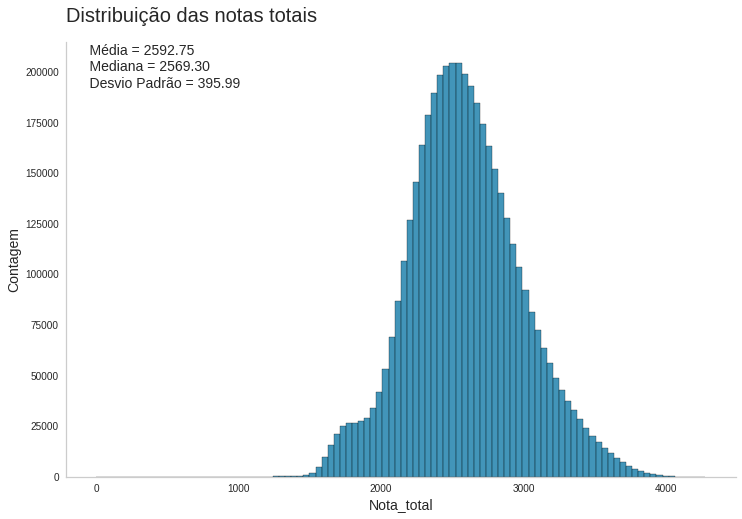

In [12]:
# solução histograma e descrição
def gerar_hist_descricao(df, variavel, titulo):
    media = df[variavel].mean()
    mediana = df[variavel].median()
    desvio = df[variavel].std()

    descricao = f'''
    Média = {media:.2f}
    Mediana = {mediana:.2f}
    Desvio Padrão = {desvio:.2f}
    '''

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    sns.histplot(x=variavel, bins=100, ax=ax, data=df)
    sns.despine()
    ax.annotate(descricao, (0.1, 0.8), xycoords="figure fraction", fontsize=14)
    ax.set_title(titulo, loc="left", pad=20, fontsize=20)
    ax.set_xlabel(variavel.capitalize(), fontsize=14)
    ax.set_ylabel("Contagem", fontsize=14)
    ax.grid(None)
    plt.show()

gerar_hist_descricao(enem,
                     "NOTA_TOTAL",
                     "Distribuição das notas totais")

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


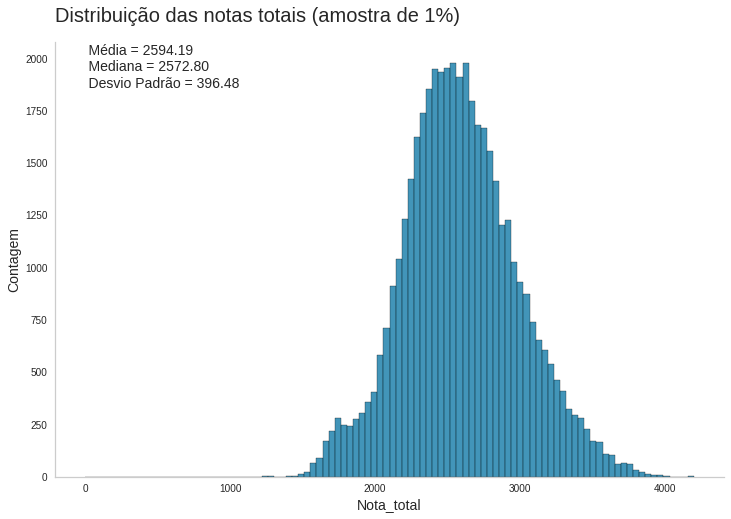

In [13]:
# solução sua função de sampling

def eda_sample(enem):
    SEED = 745
    enem_eda = enem.sample(frac=0.01, random_state=SEED)
    print("Enem EDA sampling tem a distribuição")
    
    gerar_hist_descricao(enem_eda,
                         "NOTA_TOTAL",
                         "Distribuição das notas totais (amostra de 1%)")

    return enem_eda

enem_eda = eda_sample(enem)

> Média, mediana e desvio padrão da amostra sofreram pequenas alterações e parecem representar satisfatoriamente a população. O histograma também preservou sua forma geral.



## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [14]:
# solução
correlacoes = enem_eda.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NOTA_TOTAL
NU_NOTA_CN,1.000,0.610,0.568,0.553,0.342,0.317,0.386,0.379,0.350,0.731
NU_NOTA_CH,0.610,1.000,0.707,0.571,0.396,0.357,0.436,0.425,0.391,0.792
NU_NOTA_LC,0.568,0.707,1.000,0.547,0.443,0.371,0.458,0.448,0.398,0.777
NU_NOTA_MT,0.553,0.571,0.547,1.000,0.361,0.330,0.397,0.389,0.352,0.763
NU_NOTA_COMP1,0.342,0.396,0.443,0.361,1.000,0.771,0.832,0.862,0.594,0.726
NU_NOTA_COMP2,0.317,0.357,0.371,0.330,0.771,1.000,0.859,0.795,0.634,0.694
NU_NOTA_COMP3,0.386,0.436,0.458,0.397,0.832,0.859,1.000,0.866,0.674,0.774
NU_NOTA_COMP4,0.379,0.425,0.448,0.389,0.862,0.795,0.866,1.000,0.653,0.760
NU_NOTA_COMP5,0.350,0.391,0.398,0.352,0.594,0.634,0.674,0.653,1.000,0.675
NOTA_TOTAL,0.731,0.792,0.777,0.763,0.726,0.694,0.774,0.760,0.675,1.000


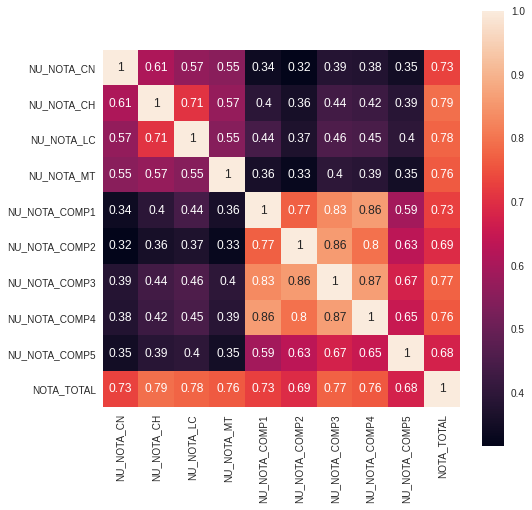

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
sns.heatmap(correlacoes, annot=True, square=True, ax=ax)
ax = ax

In [16]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [17]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes["NOTA_TOTAL"]

In [18]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
NOTA_TOTAL      1.000
Name: NOTA_TOTAL, dtype: float64


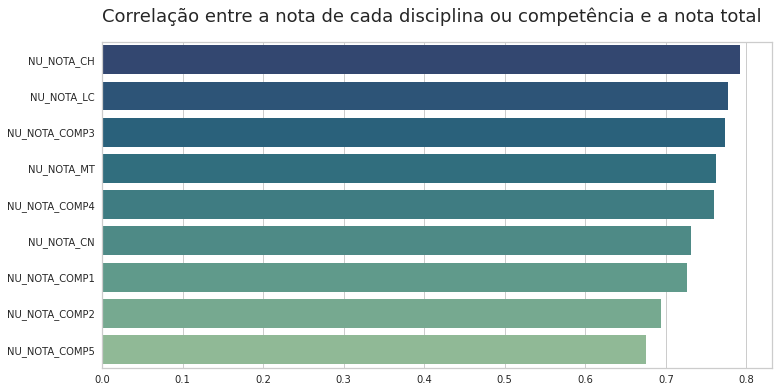

In [19]:
# solução gráfico

def plota_correlacao(dados):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    corr = dados.sort_values(ascending=False).drop("NOTA_TOTAL")
    sns.barplot(y=corr.index, x=corr.values, orient="h", palette="crest_r")
    sns.set(style="white")
    ax.set_title("Correlação entre a nota de cada disciplina ou competência e a nota total",
                 loc="left", pad=20, fontsize=18)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [20]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[["NU_NOTA_MT", "NU_NOTA_LC", "NOTA_TOTAL"]]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,NOTA_TOTAL
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [21]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    SEED = 42367
    np.random.seed(SEED)

    features = dados.columns.drop("NOTA_TOTAL").to_list()

    X = dados[features]
    y = dados["NOTA_TOTAL"]
    train_x, test_x, train_y, test_y = train_test_split(X, y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", round(test_y.std(), 2))
    return train_x, test_x, train_y, test_y

In [22]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.68


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):

    model = LinearRegression()
    model.fit(train_x, train_y)

    test_pred = model.predict(test_x)

    r2_score = model.score(test_x, test_y)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    print("*" * 80)
    print(f"r2 score: {r2_score:.3f}")
    print(f"mse: {mse:.3f}")
    print(f"mae: {mae:.3f}\n")
    
    metrics = {
        "r2_score": r2_score,
        "mse": mse,
        "mae": mae
    }

    return model, test_pred, metrics

In [25]:
# código pronto

model, test_pred, metrics = roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score: 0.769
mse: 36308.892
mae: 142.103



## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

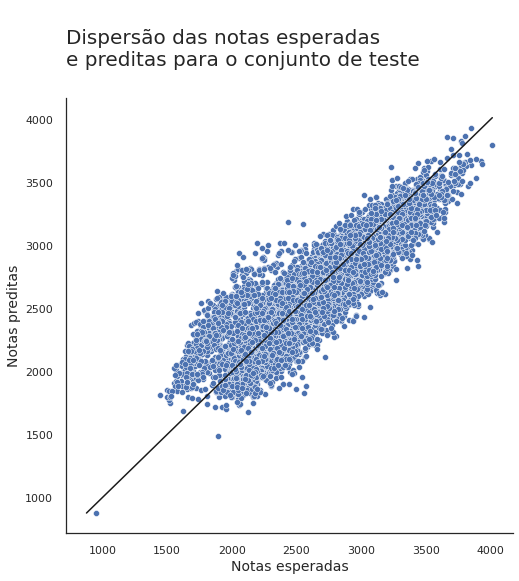

In [26]:
# Antes, uma análise gráfica das predições:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
min = np.min((test_y.min(), test_pred.min()))
max = np.max((test_y.max(), test_pred.max()))
sns.scatterplot(x=test_y, y=test_pred, ax=ax)
sns.lineplot(x=(min, max), y=(min, max), color="k", ax=ax)
sns.despine()

titulo = '''
Dispersão das notas esperadas
e preditas para o conjunto de teste
'''
ax.set_title(titulo,
             loc="left", pad=10, fontsize=20)
ax.set_xlabel("Notas esperadas", fontsize=14)
ax.set_ylabel("Notas preditas", fontsize=14)
ax = ax

In [27]:
# Comparação entre o erro médio absoluto das predições e o desvio padrão das
# notas totais do conjunto de testes

ratio = 100 * metrics["mae"] / test_y.std()
print(f'''
O erro médio absoluto dos valores estimados pelo modelo correspondem
a {ratio:.2f}% do desvio padrão dos valores esperados.
''')


O erro médio absoluto dos valores estimados pelo modelo correspondem
a 35.82% do desvio padrão dos valores esperados.



## Solução

> Analisando o gráfico de dispersão, nota-se que o resultado do modelo apresenta um desvio considerável do valor esperado para todo o domínio das notas totais do conjunto de teste. Esse desvio é mais acentuado para notas totais esperadas abaixo de 2500, indicando que o modelo é capaz de prever melhor as notas totais acima de 2500. O erro médio absoluto revela que, em média, as previsões do modelo erram a nota total por aproximadamente 142 pontos, valor que corresponde a 35,83% do desvio padrão das notas totais do conjunto de teste. Reunindo todas essas observações, e considerando que somente duas das nove notas possíveis foram utilizadas, pode-se concluir que o desempenho do modelo (razoável) serve como uma boa linha de base.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

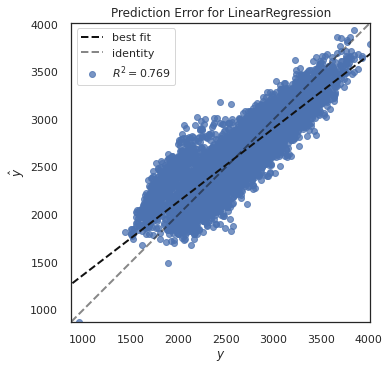

In [28]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x, train_y, test_x, test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x, train_y, test_x, test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

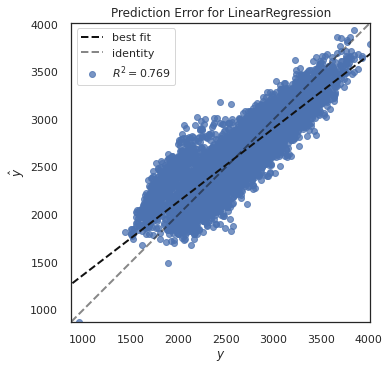

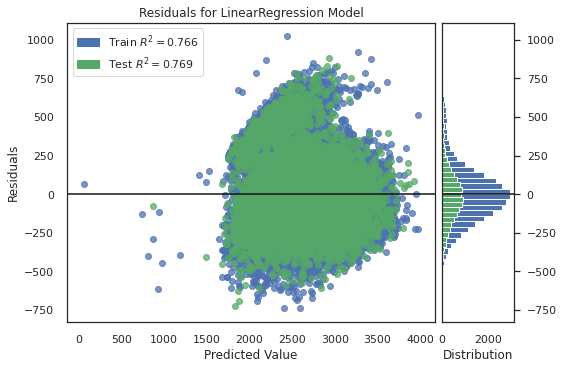

In [29]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [30]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model, test_pred, metrics = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x, train_y, test_x, test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 1.000
mse: 0.000
mae: 0.000



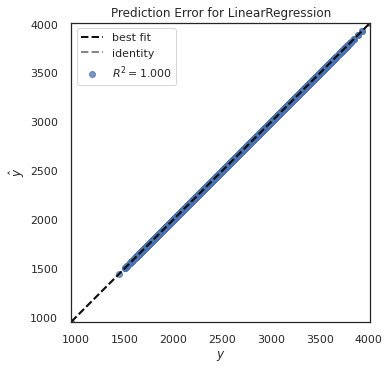

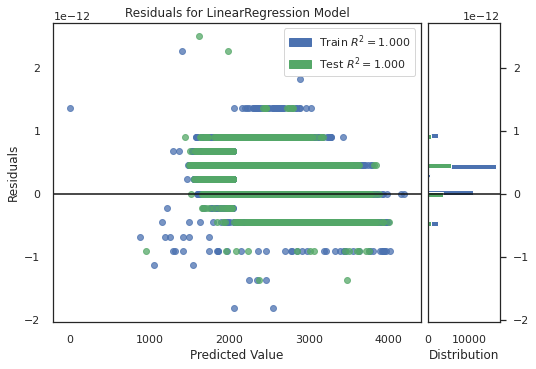

In [31]:
# solução 1: teste com todas as notas

todas_as_notas = ["NU_NOTA_CN",
                  "NU_NOTA_CH",
                  "NU_NOTA_LC",
                  "NU_NOTA_MT",
                  "NU_NOTA_COMP1",
                  "NU_NOTA_COMP2",
                  "NU_NOTA_COMP3",
                  "NU_NOTA_COMP4",
                  "NU_NOTA_COMP5",
                  "NOTA_TOTAL"]

regressao_completa_para(todas_as_notas)

> Usando todas a notas como entradas do modelo, ele é capaz de prever precisamente a nota total.

In [32]:
# solução 2: teste com oito notas - qual é o erro mínimo?

def split_drop(dados, to_drop):
    SEED = 42367
    np.random.seed(SEED)

    features = dados.columns.drop([to_drop, "NOTA_TOTAL"]).to_list()

    X = dados[features]
    y = dados["NOTA_TOTAL"]
    train_x, test_x, train_y, test_y = train_test_split(X, y)

    print("*" * 80)
    print(f"Removendo a nota {to_drop}:")

    return train_x, test_x, train_y, test_y

cols_to_drop = ["NU_NOTA_CN",
                "NU_NOTA_CH",
                "NU_NOTA_LC",
                "NU_NOTA_MT",
                "NU_NOTA_COMP1",
                "NU_NOTA_COMP2",
                "NU_NOTA_COMP3",
                "NU_NOTA_COMP4",
                "NU_NOTA_COMP5"]

min_mae = np.inf
best_to_drop = None

for col in cols_to_drop:
    train_x, test_x, train_y, test_y = split_drop(enem_eda, to_drop=col)
    _, _, metrics = roda_regressao_linear(train_x, test_x, train_y, test_y)
    mae = metrics["mae"]

    if mae < min_mae:
        best_to_drop = col
        min_mae = mae

print(f'''O menor erro absoluto médio para oito notas é de {min_mae:.2f},
removendo a nota {best_to_drop}.
''')

********************************************************************************
Removendo a nota NU_NOTA_CN:
********************************************************************************
r2 score: 0.982
mse: 2838.614
mae: 42.830

********************************************************************************
Removendo a nota NU_NOTA_CH:
********************************************************************************
r2 score: 0.983
mse: 2698.151
mae: 40.297

********************************************************************************
Removendo a nota NU_NOTA_LC:
********************************************************************************
r2 score: 0.988
mse: 1834.529
mae: 32.863

********************************************************************************
Removendo a nota NU_NOTA_MT:
********************************************************************************
r2 score: 0.958
mse: 6577.890
mae: 65.129

****************************************************************

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.670
mse: 51930.064
mae: 183.511



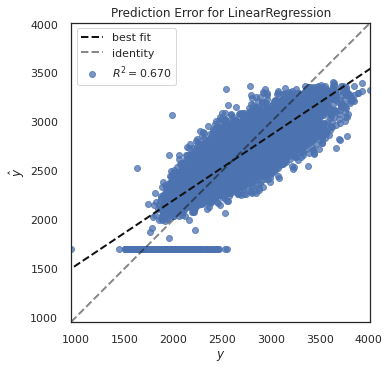

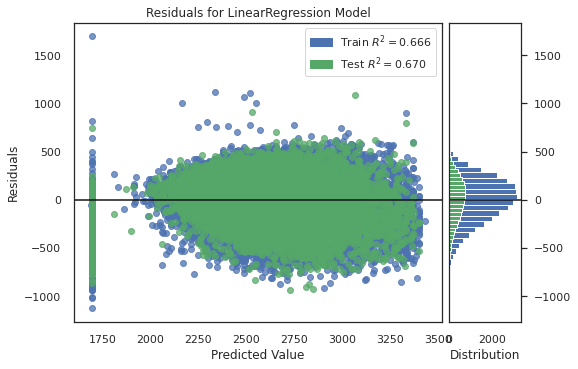

In [33]:
# solução 3: teste com somente as notas de redação

notas_redacao = ["NU_NOTA_COMP1",
                 "NU_NOTA_COMP2",
                 "NU_NOTA_COMP3",
                 "NU_NOTA_COMP4",
                 "NU_NOTA_COMP5",
                 "NOTA_TOTAL"]

regressao_completa_para(notas_redacao)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.848
mse: 23991.007
mae: 109.065



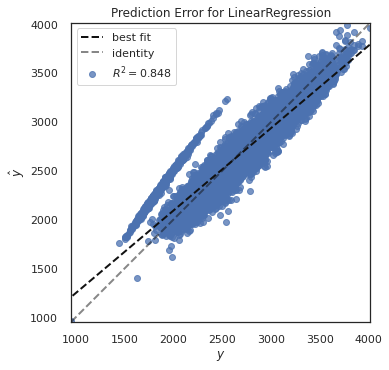

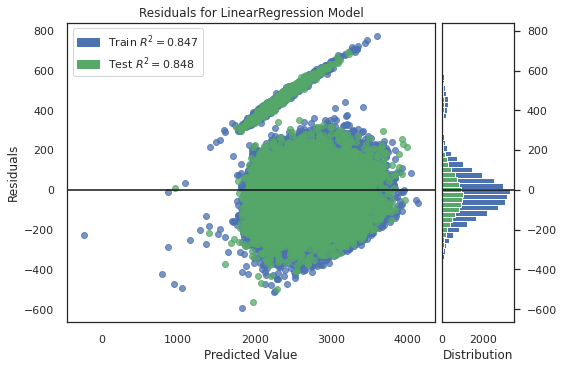

In [34]:
# solução 4: teste com somente as notas das provas

notas_provas = ["NU_NOTA_CN",
                "NU_NOTA_CH",
                "NU_NOTA_LC",
                "NU_NOTA_MT",
                "NOTA_TOTAL"]

regressao_completa_para(notas_provas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.968
mse: 5003.032
mae: 56.345



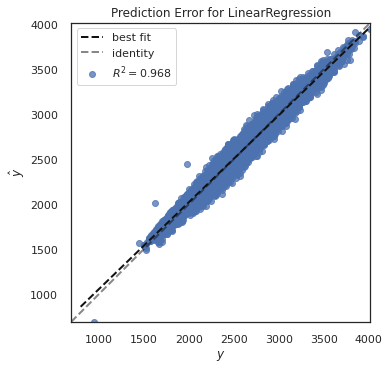

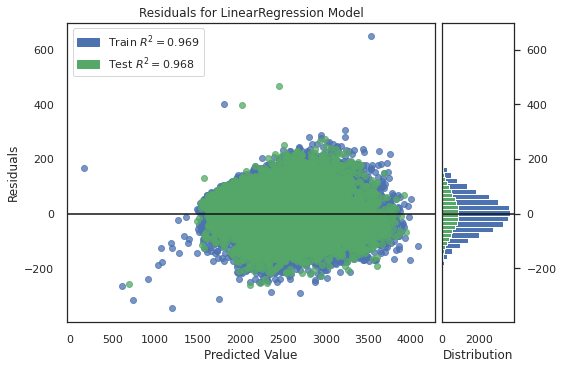

In [35]:
# solução 5: teste com as cinco notas mais correlacionadas com a nota total

cinco_notas_maior_corr = ["NU_NOTA_CH",
                          "NU_NOTA_LC",
                          "NU_NOTA_MT",
                          "NU_NOTA_COMP3",
                          "NU_NOTA_COMP4",
                          "NOTA_TOTAL"]

regressao_completa_para(cinco_notas_maior_corr)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.892
mse: 17035.902
mae: 103.400



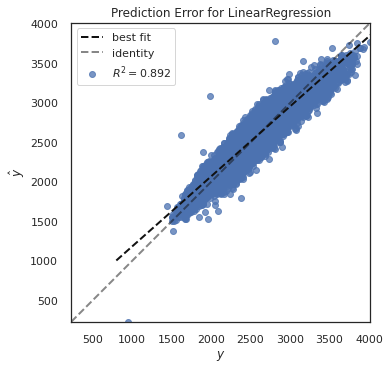

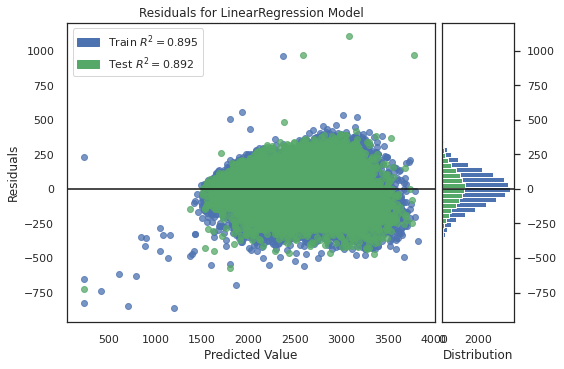

In [36]:
# solução 6: teste com as três notas mais correlacionadas com a nota total

tres_notas_maior_corr = ["NU_NOTA_CH",
                         "NU_NOTA_LC",
                         "NU_NOTA_COMP3",
                         "NOTA_TOTAL"]

regressao_completa_para(tres_notas_maior_corr)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.620
mse: 59765.689
mae: 186.177



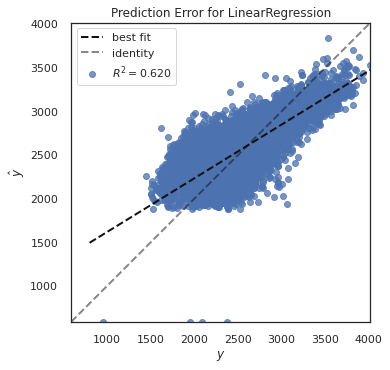

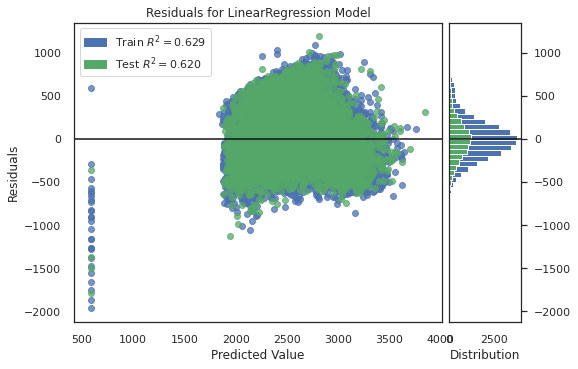

In [37]:
# solução 7: teste com somente a nota mais correlacionada com a nota total

nota_maior_corr = ["NU_NOTA_CH",
                   "NOTA_TOTAL"]

regressao_completa_para(nota_maior_corr)

> De acordo com a tabela de correlação, as notas das provas mais correlacionadas com a nota total são as de ciências humanas e de linguagens e códigos. No entanto a forte correlação entre essas duas notas possibilita, supostamente, a escolha de somente uma delas, aquela que melhor explica a nota total (**ciências humanas**). Além disso, observa-se que as notas das competências na redação têm forte correlação entre si, o que nos leva a supor que a influência da nota da redação na nota total pode ser estimada por somente uma dessas competências, a que tem maior correlação com a nota total (**competência 3**). Essa estratégia definiu as variáveis da solução seguinte:

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.851
mse: 23414.616
mae: 121.362



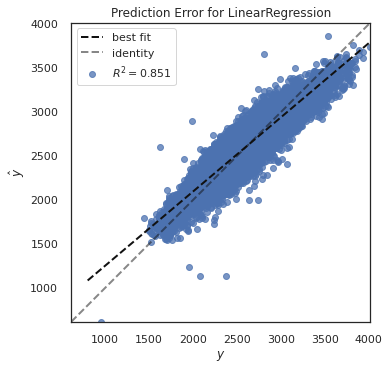

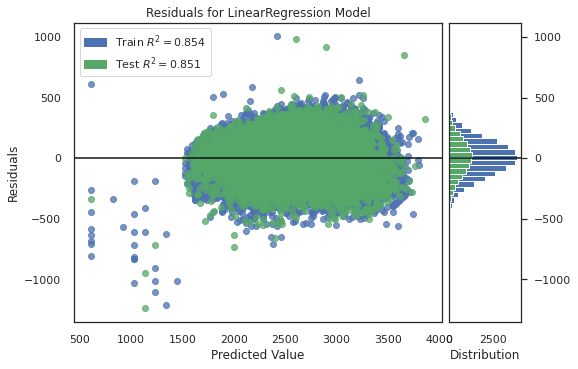

In [38]:
# solução 8: teste com a melhor prova e a melhor competência

notas_ch_comp3 = ["NU_NOTA_CH",
                  "NU_NOTA_COMP3",
                  "NOTA_TOTAL"]

regressao_completa_para(notas_ch_comp3)

> Usando apenas duas variáveis, como naquela primeira hipótese avaliada, mas escolhendo-as com cuidado, foi possível melhorar o desempenho do modelo significativamente:

> Usando as notas de matemática e de linguagens e códigos:
```
r2 score: 0.769
mse: 36308.892
mae: 142.103
```

> Usando as notas de ciência humanas e da competência 3:
```
r2 score: 0.851
mse: 23414.616
mae: 121.362
```




> Parece importante averiguar o efeito da inclusão de uma terceira variável ao modelo acima. A nota de matemática, por ter a maior correlação além das que já foram analisadas, é a escolha mais óbvia:

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.936
mse: 10017.265
mae: 79.526



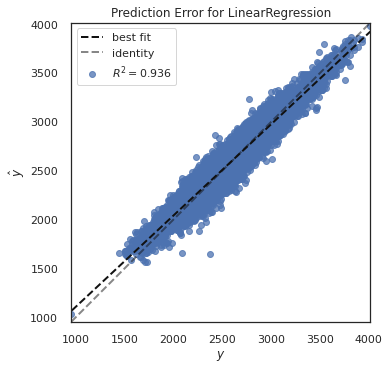

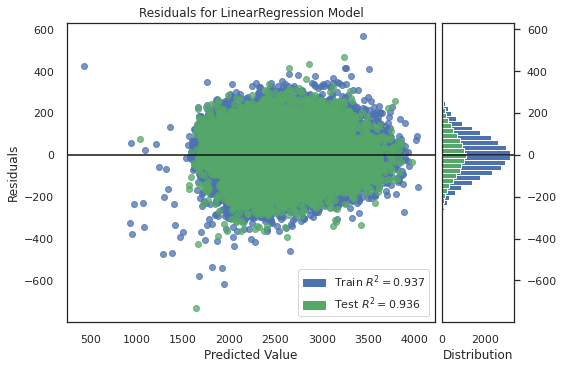

In [39]:
# solução 9: teste outra combinação

notas_ch_mt_comp3 = ["NU_NOTA_CH",
                     "NU_NOTA_MT",
                     "NU_NOTA_COMP3",
                     "NOTA_TOTAL"]

regressao_completa_para(notas_ch_mt_comp3)

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto com a de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.68
********************************************************************************
r2 score: 0.925
mse: 11788.568
mae: 86.187



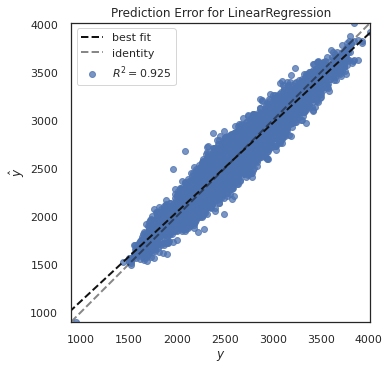

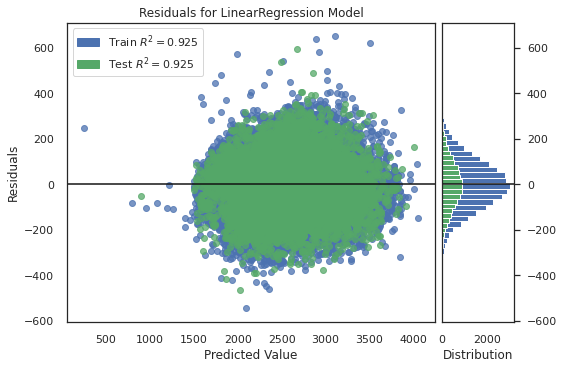

In [40]:
# solução

notas_lc_mt_comp3 = ["NU_NOTA_LC",
                     "NU_NOTA_MT",
                     "NU_NOTA_COMP3",
                     "NOTA_TOTAL"]

regressao_completa_para(notas_lc_mt_comp3)

> O modelo que usa as notas NU_NOTA_LC, NU_NOTA_MT e NU_NOTA_COMP3 performa melhor do que a maioria dos modelos avaliados na etapa anterior, mas não supera o modelo que usa as notas NU_NOTA_CH, NU_NOTA_MT e NU_NOTA_COMP3.

> Com as notas NU_NOTA_LC, NU_NOTA_MT e NU_NOTA_COMP:
```
r2 score: 0.925
mse: 11788.568
mae: 86.187
```

> Com as notas NU_NOTA_CH, NU_NOTA_MT e NU_NOTA_COMP3:
```
r2 score: 0.936
mse: 10017.265
mae: 79.526
```


## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [41]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():

    modelos = [LinearRegression(),
               Lasso(),
               Ridge(),
               DecisionTreeRegressor(),
               RandomForestRegressor()]

    return modelos

In [42]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [43]:
# solução

def escolhe_dados(dados, colunas):
    interesse = dados[colunas]
    train_x, test_x, train_y, test_y = split(interesse)
    plt.hist(train_y, bins=50)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [44]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    test_pred = modelo.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [45]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    # Modifiquei a nota NU_NOTA_LC por NU_NOTA_CH,
    # de acordo com os resultados obtidos anteriormente
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_CH",
                                                             "NU_NOTA_MT",
                                                             "NU_NOTA_COMP3",
                                                             "NOTA_TOTAL"])
    
    resultados = []
    for modelo in gera_regressores():
        
        scaler = StandardScaler()
        pipe = Pipeline([("scaler", scaler), ("modelo", modelo)])
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.68


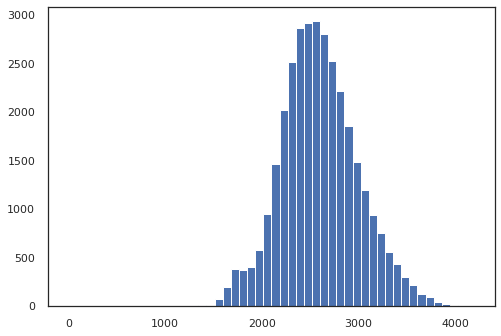

Resultado Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('modelo',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 10017.264938211862 79.52604231750544
Resultado Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('modelo',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 10020.698004636513 79.57866508263453
Resultado Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
           

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",10017.265,79.526,0.008
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",10020.698,79.579,0.008
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",10017.274,79.526,0.008
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",19126.484,109.404,0.180
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",11088.354,83.148,8.734


In [46]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

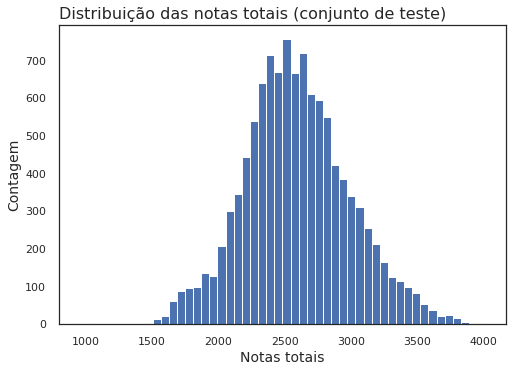

In [47]:
# solução: histograma

titulo = "Distribuição das notas totais (conjunto de teste)"

plt.hist(test_y, bins=50)
plt.title(titulo, loc="left", fontsize=16)
plt.xlabel("Notas totais", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [48]:
# solução

def top_p(serie, p=0.75):
    quant = serie.quantile(p)
    print("Quantil encontrado: ", quant)

    y = serie.apply(lambda x: int(x > quant))

    return y

In [49]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

Quantil encontrado:  7.75


In [50]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

Quantil encontrado:  9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [51]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

Quantil encontrado:  2837.8500000000004


0.2500225896810337

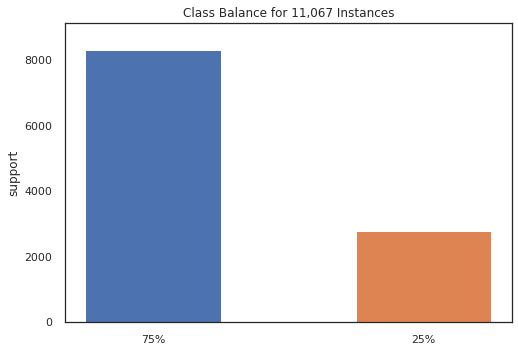

In [52]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

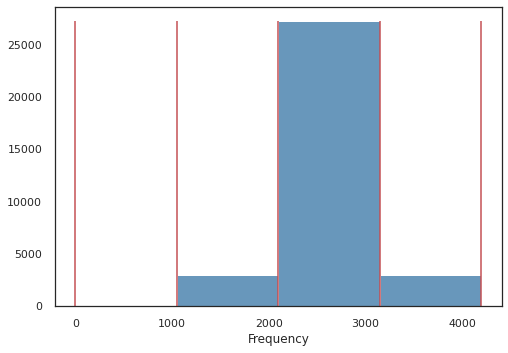

In [53]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [54]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
# solução

def gera_classificadores():

    modelos = [DummyClassifier(strategy="most_frequent"),
               LogisticRegression(),
               RidgeClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=10),
               SVC()]

    return modelos

In [56]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [57]:
def split_classificacao(dados):

    SEED = 42367
    np.random.seed(SEED)

    features = dados.columns.drop("top_p").to_list()

    X = dados[features]
    y = dados["top_p"]
    train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [58]:
# código pronto: teste

# Modifiquei a nota NU_NOTA_LC por NU_NOTA_CH
interesse = enem_eda[["NOTA_TOTAL", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['NOTA_TOTAL'])
interesse = interesse[["top_p", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

Quantil encontrado:  2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


## Pergunta: implemente o treino e o teste do classificador

In [59]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    accuracy_score = pipe.score(test_x, test_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [60]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]
    nota_total = dados["NOTA_TOTAL"]
    interesse['top_p'] = top_p(nota_total, p)

    colunas.remove("NOTA_TOTAL")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

Quantil encontrado:  2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


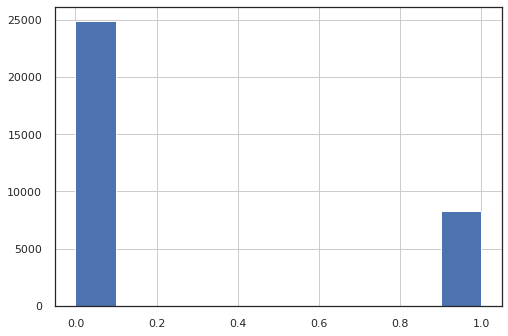

In [61]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["NOTA_TOTAL", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [62]:
# código pronto

def analisa_classificacao(dados, p=0.75):
    
    colunas = ["NOTA_TOTAL", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

Quantil encontrado:  2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


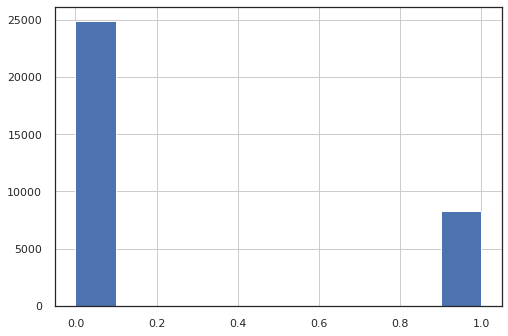

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.946236559139785
Resultado RidgeClassifier 0.9332249028643715
Resultado DecisionTreeClassifier 0.9198518116924189
Resultado RandomForestClassifier 0.9362970994849553
Resultado SVC 0.9460558416915154


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.009
LogisticRegression,0.946,0.090
RidgeClassifier,0.933,0.026
DecisionTreeClassifier,0.920,0.125
RandomForestClassifier,0.936,0.297
SVC,0.946,6.560


In [63]:
# solução top 25%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
notas[["accuracy_score", "tempo_de_treino"]]

Quantil encontrado:  2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19996385651034607


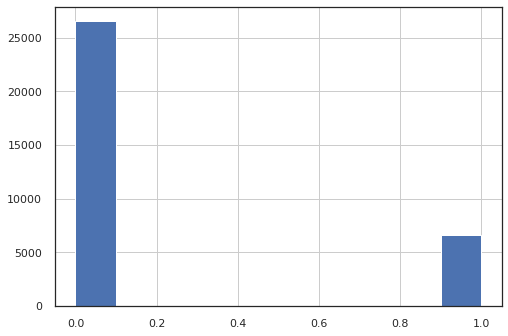

Resultado DummyClassifier 0.8000361434896539
Resultado LogisticRegression 0.9532845396223005
Resultado RidgeClassifier 0.9336766964850456
Resultado DecisionTreeClassifier 0.9326827505195626
Resultado RandomForestClassifier 0.945242613174302
Resultado SVC 0.9526520285533568


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.010
LogisticRegression,0.953,0.081
RidgeClassifier,0.934,0.023
DecisionTreeClassifier,0.933,0.130
RandomForestClassifier,0.945,0.306
SVC,0.953,5.573


In [64]:
# solução top 20%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.80)
notas[["accuracy_score", "tempo_de_treino"]]

Quantil encontrado:  3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.09993674889310562


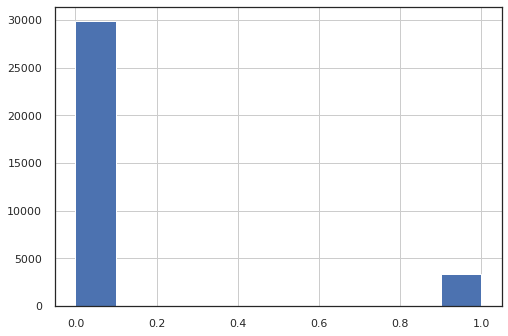

Resultado DummyClassifier 0.9000632511068943
Resultado LogisticRegression 0.9738863287250384
Resultado RidgeClassifier 0.9306044998644619
Resultado DecisionTreeClassifier 0.9632239992771302
Resultado RandomForestClassifier 0.9703623384837806
Resultado SVC 0.9739766874491732


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.009
LogisticRegression,0.974,0.094
RidgeClassifier,0.931,0.023
DecisionTreeClassifier,0.963,0.105
RandomForestClassifier,0.970,0.227
SVC,0.974,3.220


In [65]:
# solução top 10%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.9)
notas[["accuracy_score", "tempo_de_treino"]]

Quantil encontrado:  3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


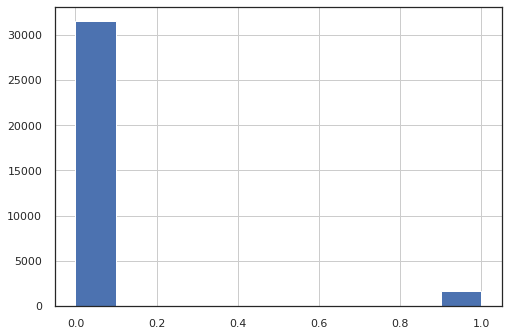

Resultado DummyClassifier 0.9500316255534472
Resultado LogisticRegression 0.9835547122074636
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9773199602421614
Resultado RandomForestClassifier 0.9824704075178459
Resultado SVC 0.9839161471040029


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.009
LogisticRegression,0.984,0.114
RidgeClassifier,0.950,0.022
DecisionTreeClassifier,0.977,0.092
RandomForestClassifier,0.982,0.217
SVC,0.984,1.692


In [66]:
# solução top 5%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.95)
notas[["accuracy_score", "tempo_de_treino"]]

Quantil encontrado:  3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


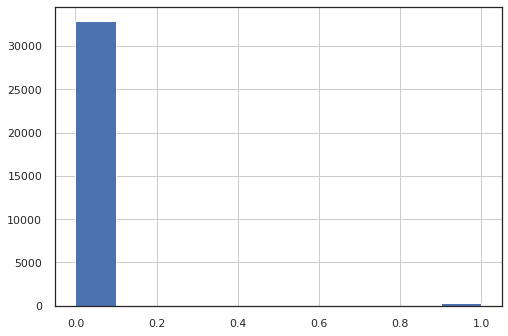

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9954820637932592
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9940363242071022
Resultado RandomForestClassifier 0.9953013463449896
Resultado SVC 0.9955724225173941


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.007
LogisticRegression,0.995,0.102
RidgeClassifier,0.990,0.019
DecisionTreeClassifier,0.994,0.075
RandomForestClassifier,0.995,0.208
SVC,0.996,0.546


In [67]:
# solução top 1%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.99)
notas[["accuracy_score", "tempo_de_treino"]]

Quantil encontrado:  2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


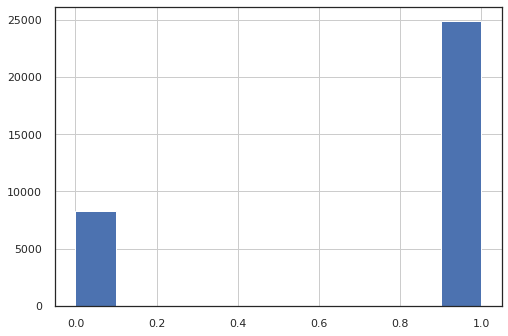

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9200325291406886
Resultado RidgeClassifier 0.8989789464172766
Resultado DecisionTreeClassifier 0.8913888135899521
Resultado RandomForestClassifier 0.9067497966928707
Resultado SVC 0.9214782687268456


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.011
LogisticRegression,0.920,0.071
RidgeClassifier,0.899,0.023
DecisionTreeClassifier,0.891,0.129
RandomForestClassifier,0.907,0.315
SVC,0.921,11.703


In [68]:
# solução bottom 25%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.25)
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta para os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

Quantil encontrado:  2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


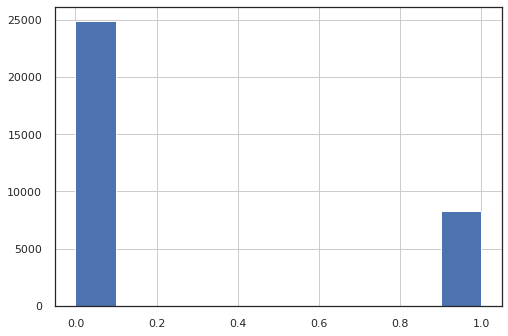

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.946236559139785
Resultado RidgeClassifier 0.9332249028643715
Resultado DecisionTreeClassifier 0.9198518116924189
Resultado RandomForestClassifier 0.9362970994849553
Resultado SVC 0.9460558416915154


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.014
LogisticRegression,0.946,0.107
RidgeClassifier,0.933,0.055
DecisionTreeClassifier,0.920,0.174
RandomForestClassifier,0.936,0.403
SVC,0.946,10.455


In [69]:
# código pronto: rodando para top 25%

test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [70]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.946236559139785


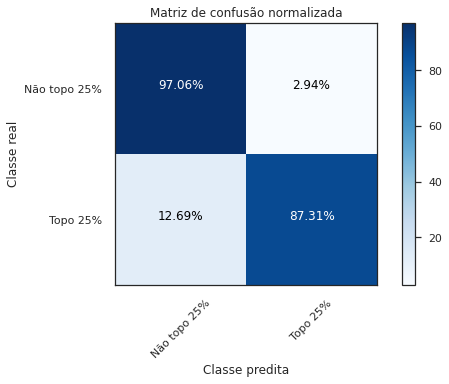

In [71]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9460558416915154


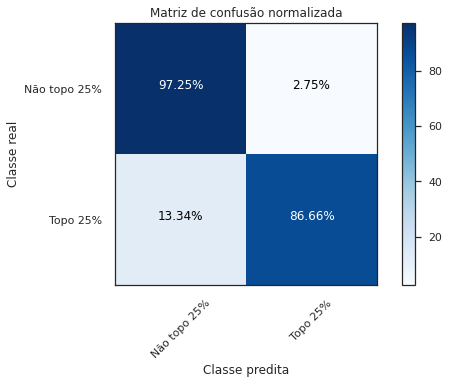

In [72]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [73]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [74]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    y = top_p(dados["NOTA_TOTAL"])
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [75]:
# solução

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    
    pipe = Pipeline([("scaler", StandardScaler()), ("modelo", modelo)])

    scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=5), verbose=1, n_jobs=-1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.3f,%.3f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

Quantil encontrado:  2839.5
Média da validação 0.24992658278278979


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.2s finished


Acurácia entre [94.439,94.446]
Acurácia do modelo em teste 0.9445739371274804


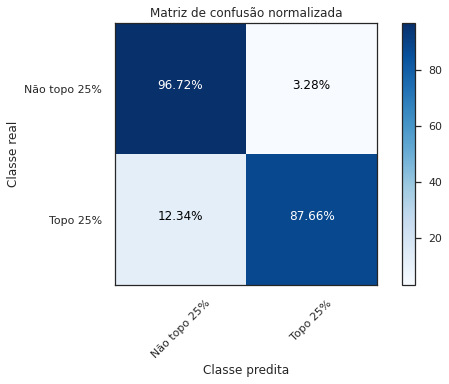

In [76]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se somente sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [77]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=1)
        y_pred_true_false = parcial > self.top_25_quantile
        y_pred = [1 if y else 0 for y in y_pred_true_false]
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

Quantil encontrado:  2839.5
Média da validação 0.24992658278278979


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


Acurácia entre [94.246,94.253]
top 25 quantile é 1266.90
Acurácia do modelo em teste 0.9277136475247959


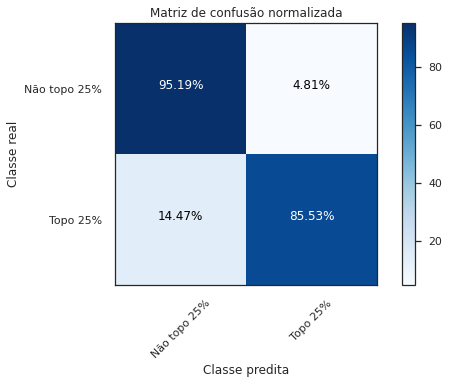

In [78]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

Quantil encontrado:  2839.5
Média da validação 0.24992658278278979


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


Acurácia entre [75.007,75.007]
Acurácia do modelo em teste 0.7500734172172102


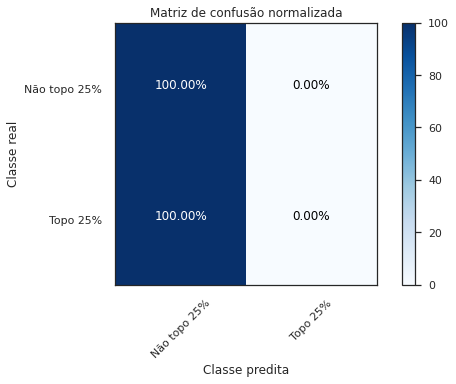

In [79]:
pipeline_logistica = make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent"))
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

**DummyClassifier:**
> Acurácia (validação) = [75.007%, 75.007%]

**Modelo heurístico:**
> Acurácia (validação) = [94.246%, 94.253%]

**Logistic Regression:**
> Acurácia (validação) = [94.439%, 94.446%]

> A acurácia do modelo DummyClassifier, de ~75%, é enganosa. Conforme foi projetado, o modelo prevê corretamente a classe mais frequente, que contém 75% dos dados, mas falha na predição de todos aqueles que estão de fato entre os 25% melhores alunos, sendo incapaz de cumprir o objetivo principal do projeto. Os modelos heurístico e de regressão logística têm performance bastante similar, sugerindo que talvez não seja necessário aplicar um modelo mais complexo de classificação nesse contexto. Essa impressão é mais forte quando somente a acurácia dos modelos é comparada, mas o resultado da matriz de confusão revela uma importante, embora pequena, vantagem do modelo de regressão logística, que prediz corretamente 87.66% dos reais "topo 25%" alunos, contra 85.53% do modelo heurístico.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

> Uma opção é um modelo heurístico que avalia os quantis de três notas de interesse separadamente e privilegia os alunos que tenham pelo menos duas notas acima do quantil escolhido. O exemplo abaixo testa esse modelo para as mesmas três notas usadas anteriormente ("NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3"):

In [80]:
pd.options.mode.chained_assignment = None

quantil = 0.75
notas_interesse = ["NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_COMP3", "NOTA_TOTAL"]

temp = enem_eda.copy()
temp_interesse = temp[notas_interesse]
quantis_75 = temp_interesse.quantile(quantil)

for nota in notas_interesse:
    parcial = temp_interesse[nota] > quantis_75[nota]
    temp_interesse[f"{nota}_P75"] = parcial.astype(int)

notas_p75 = [f"{nota}_P75" for nota in notas_interesse if nota != "NOTA_TOTAL"]
temp_interesse[f"P75_DUAS_PROVAS"] = (temp_interesse[notas_p75].sum(axis=1) >= 2).astype(int)

acertos = temp_interesse["P75_DUAS_PROVAS"] == temp_interesse["NOTA_TOTAL_P75"]
acuracia = acertos.sum() / acertos.count()

print(f"Acurácia = {acuracia:.2f}%")

Acurácia = 0.92%


## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

> Uma parcela considerável dos alunos que estariam no top 25% seria privada erroneamente da bolsa de estudos. No modelo com melhor desempenho, o de regressão logística, essa parcela seria de 12.24%. Por outro lado, esse mesmo modelo classifica como passíveis de bolsa 3.28% dos alunos que não estariam no top 25%. **Esses números levam à conclusão de que um processo de seleção justo não pode depender de um modelo de classificação que considere somente uma pequena porção do conteúdo abordado pelas provas.**

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

In [81]:
# Obrigado!